In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

filename = "ABETDATA.csv"
file = open(filename)

LoL = []
column = []

first = True
for line in file:
    line = line.strip()
    if first == True:
        column = line.split(",")
        first = False
    else:
        data = line.split(",")
        LoL.append(data)

comp = []
tech = []

for row in LoL:
    if row[3] == "Moderate":
        comp.append(row[5:])
        tech.append(row[0])
        
arr = np.array(comp, dtype=float)

capex = arr[:, 0]
lcoe  = arr[:, 1]

In [2]:
capex_mean = round(np.mean(capex),2)
capex_median = round(np.median(capex),2)
capex_std = round(np.std(capex),2)

lcoe_mean = round(np.mean(lcoe),2)
lcoe_median = round(np.median(lcoe),2)
lcoe_std = round(np.std(lcoe),2)

print("CAPEX Statistics ($/kW):")
print("Mean:", capex_mean)
print("Median:", capex_median)
print("Standard Deviation:", capex_std)

print("\nLCOE Statistics ($/MWh):")
print("Mean:", lcoe_mean,)
print("Median:", lcoe_median)
print("Standard Deviation:", lcoe_std)

CAPEX Statistics ($/kW):
Mean: 4984.68
Median: 1855.68
Standard Deviation: 4685.34

LCOE Statistics ($/MWh):
Mean: 67.51
Median: 44.79
Standard Deviation: 49.96


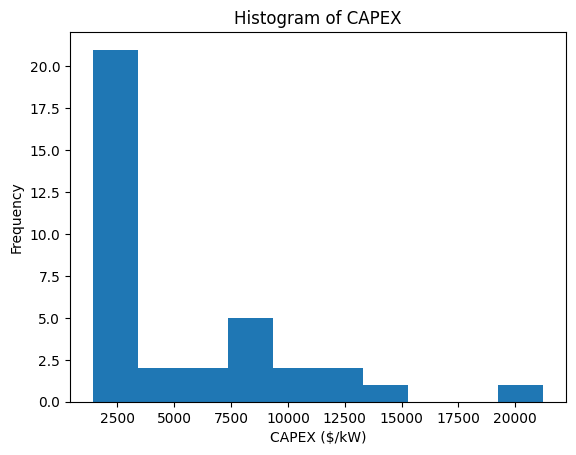

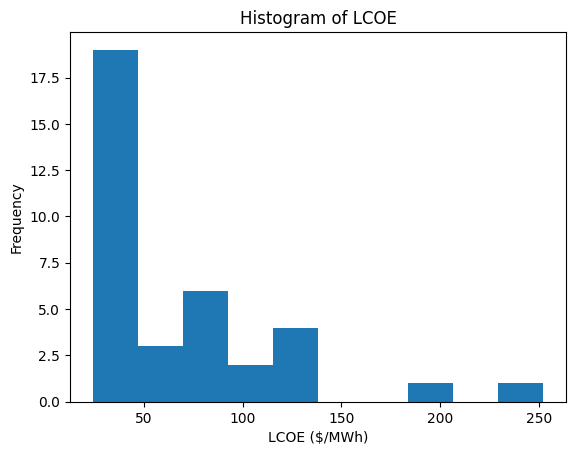

In [3]:
plt.hist(capex, bins=10)
plt.xlabel("CAPEX ($/kW)")
plt.ylabel("Frequency")
plt.title("Histogram of CAPEX")
plt.show()

plt.hist(lcoe, bins=10)
plt.xlabel("LCOE ($/MWh)")
plt.ylabel("Frequency")
plt.title("Histogram of LCOE")
plt.show() 

In [4]:
pearson_corr, pearson_p = stats.pearsonr(capex, lcoe)
spearman_corr, spearman_p = stats.spearmanr(capex, lcoe)

print(f"Pearson: {pearson_corr:.4f}, p={pearson_p:.4f}")
print(f"Spearman: {spearman_corr:.4f}, p={spearman_p:.4f}")

Pearson: 0.9183, p=0.0000
Spearman: 0.9112, p=0.0000


In [5]:
x = capex
y = lcoe

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print("Linear Regression Results:")
print(f"  Slope: {slope:.4f}")
print(f"  Intercept: {intercept:.4f}")
print(f"  R-squared: {r_value**2:.4f}")
print(f"  p-value: {p_value:.4f}")


Linear Regression Results:
  Slope: 0.0098
  Intercept: 18.7012
  R-squared: 0.8432
  p-value: 0.0000


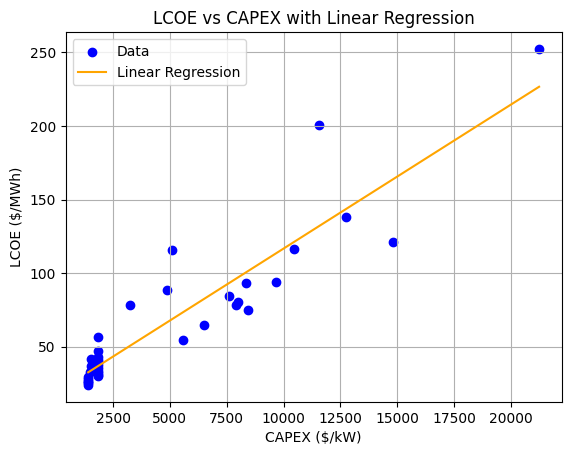

In [6]:
plt.figure()
plt.scatter(x, y, color='blue')

x_fit = np.linspace(min(x), max(x))
y_fit = slope * x_fit + intercept
plt.plot(x_fit, y_fit, color='orange')

plt.xlabel("CAPEX ($/kW)")
plt.ylabel("LCOE ($/MWh)")
plt.title("LCOE vs CAPEX with Linear Regression")
plt.legend(["Data", "Linear Regression"])
plt.grid(True)
plt.show()

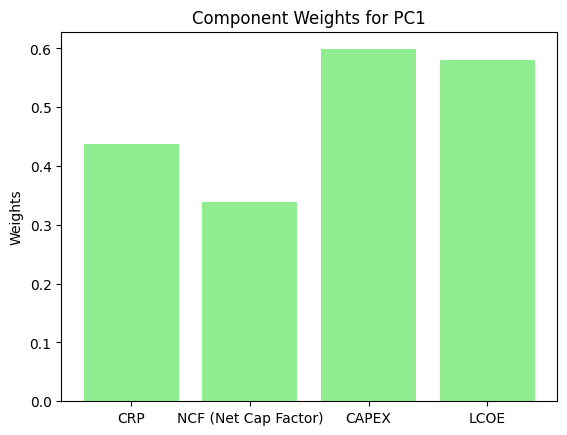

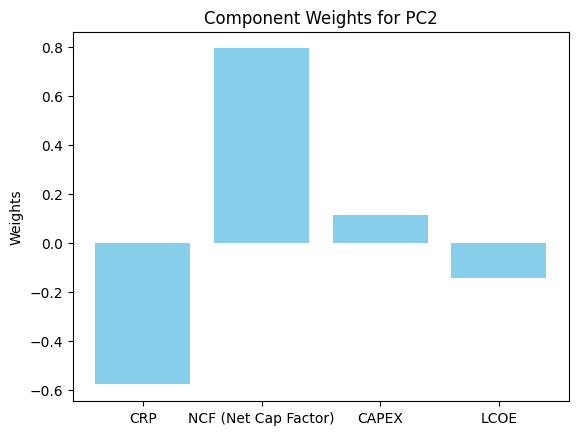

In [7]:
df = pd.read_csv("ABETDATA.csv")
df_mod = df[df["Estimate_Classification"] == "Moderate"].reset_index(drop=True)

cats = df_mod["Technology"].values
tmpa = df_mod.drop('Technology', axis=1)
tmpb = tmpa.drop('Tech_Classification', axis=1)
tmpc = tmpb.drop('Estimate_Classification', axis=1)
dfclean = tmpc.astype(float)
features = dfclean.columns

scaler = StandardScaler()
dfclean_scaled = scaler.fit_transform(dfclean)

pca = PCA(n_components=0.99)
pcs = pca.fit_transform(dfclean_scaled)

explained_variance = pca.explained_variance_ratio_
weights = pca.components_.T

plt.figure()
plt.bar(features, weights[:,0], color='lightgreen')
plt.ylabel("Weights")
plt.title("Component Weights for PC1")
plt.show()

plt.figure()
plt.bar(features, weights[:,1], color='skyblue')
plt.ylabel("Weights")
plt.title("Component Weights for PC2")
plt.show()

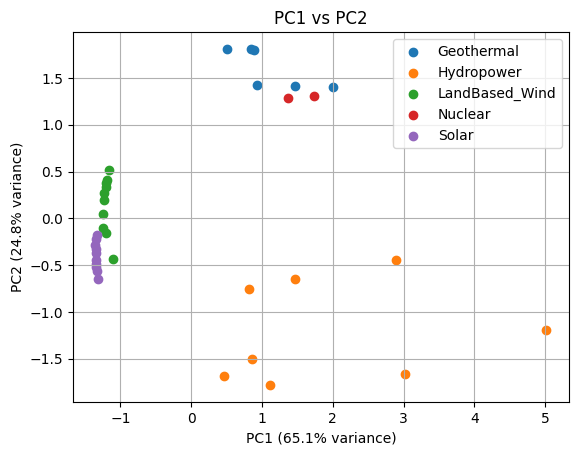

In [8]:
unique_cats = np.unique(cats)
plt.figure()
for cat in np.unique(cats):
    plt.scatter(pcs[cats == cat, 0], pcs[cats == cat, 1], label=cat)

plt.xlabel(f"PC1 ({explained_variance[0]*100:.1f}% variance)")
plt.ylabel(f"PC2 ({explained_variance[1]*100:.1f}% variance)")
plt.title("PC1 vs PC2")
plt.legend()
plt.grid(True)
plt.show()